# Assignments Week VII.<br><br>Frequency Response of Filters & Convolution using DTFT/DFT
<hr style="height:1px; border:none; background-color:blue;">

### Useful Information

**In this notebook you will be working on the mandatory assignments for week seven of Signal Processing**. In order to complete the notebook you must complete all of the necessary code blocks (labelled with "Write your code here"), and fill in all answer blocks. Each section of the notebook will state the completion criteria, which summarize everything you need to do to complete that section. **If you are stuck on a section in this notebook, it may be beneficial to check the non-mandatory exercises for this week, since they may have content that can help you!**

Mandatory assignments are pass or fail. **If your notebook is incomplete - meaning you did not complete the task required or answer the necessary questions - then you will automatically fail.** So once you finish this notebook, please look through it to make sure you've answered everything!

<hr style="height:1px; border:none; background-color:blue;">

### Objectives
- Compute and visualize the transfer function of a FIR filter using the DFT.
- Understand the relation between DTFT and DFT of the transfer function.
- Implement convolution using DFTs.
- Work with linear and circular convolutions.
- Design the impulse response of a FIR filter by specifying its transfer function in the DFT domain.

<hr style="height:3px; border:none; background-color:blue;">


<h3 style="color:blue;"> <u>Imports for Exercises and Assignments </u></h3> 

Run the code below to import modules that will be used throughout the rest of this notebook.

<br>

In [2]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys
sys.path.insert(0, './data')

#######################################################################################
#
# function for easy plotting of signals with centered axis and larger figure
#
#   nicesignalplot(scale,values,caption)
#      scale:   array with vertical scale values 't' (float)
#      values:  array with signal values 'x(t)' to plot (float or complex, 
#               in latter case .real will be used)
#      caption: caption of the plot (string)
#
######################################################################################
def nicesignalplot(scale,values,caption):
    myfigure  =  plt.figure(figsize=(15,7.5))
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot( scale, values)
    plt.title('(nicesignalplot): '+caption)
    plt.show()

###########################################################################################
#
# function for easy plotting of DFT magnitude spectrum with centered axis and larger figure
#
#      nicemagspecplot(N,dftvalues,caption,hvsize, [ylabel] )
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption: caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#      ylabel = optional string for naming vertical axis. Default is |X(ω)|.
#
##########################################################################################
def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.abs(dftvalues))
    plt.title('(nicemagspecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()
    
########################################################################################
#
# function for easy plotting of DFT phase spectrum with centered axis and larger figure
#
#      nicephasespecplot(N,dftvalues,caption,hvsize, [ylabel] )
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption:    caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#      ylabel = optional string for naming vertical axis. Default is arg(X(ω)).
#
#########################################################################################
def nicephasespecplot(N,dftvalues,caption,hvsize,ylabel='arg$(X(\hat{\omega}))$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.angle(dftvalues))
    plt.title('(nicephasespecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()

<>:64: SyntaxWarning: invalid escape sequence '\h'
<>:79: SyntaxWarning: invalid escape sequence '\h'
<>:96: SyntaxWarning: invalid escape sequence '\h'
<>:111: SyntaxWarning: invalid escape sequence '\h'
<>:64: SyntaxWarning: invalid escape sequence '\h'
<>:79: SyntaxWarning: invalid escape sequence '\h'
<>:96: SyntaxWarning: invalid escape sequence '\h'
<>:111: SyntaxWarning: invalid escape sequence '\h'
/var/folders/kq/716r1_hx0sj57c8_ccs8z3nh0000gn/T/ipykernel_6073/3842273716.py:64: SyntaxWarning: invalid escape sequence '\h'
  def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
/var/folders/kq/716r1_hx0sj57c8_ccs8z3nh0000gn/T/ipykernel_6073/3842273716.py:79: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
/var/folders/kq/716r1_hx0sj57c8_ccs8z3nh0000gn/T/ipykernel_6073/3842273716.py:96: SyntaxWarning: invalid escape sequence '\h'
  def nicephasespecplot(N,dftvalues,caption,hvsize,yla

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VI.1 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u>Python Hands-on Assignment VII.1: FIR filter design</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assigment.</b>
<ul>
<li> Display the computed impulse responses and analyze their symmetry.</li>
<li>Display and explain the frequency response plots for the different given values of $K$.</li>
<li>Display the raised-cosine windows for $K=20$ and $N=128$.</li>
<li>Display the resulting frequency response of the filter after applying the raised-cosine window.
  Explain how the result differs from earlier results.</li>
<li>Explain in at most five sentences how you solve the design of the high-pass filter.Show the magnitude and phase of the resulting frequency response.</li>
</ul>
<hr>
</div>

The proper design of filter coefficients/impulse response $h[n]$ is crucial for the success of discrete signal processing in a variety of applications. There is a wide range of design toolkits available. We here consider the simplest of all, which is the design of zero-phase FIR filters by specifying their frequency response. The terminology _zero-phase_ means that all DFT coefficients of the frequency response are real-valued and hence their phase is zero. This leads to a FIR filter of which the impulse response is symmetric around $n$=0.

We design a low-pass filter which ideally passes all frequencies smaller than $\pi/2$ . Because of required symmetry of the frequency response, the filter passes also all frequencies larger than $3\pi/2$. For all other frequencies the response is "0", as illustrated in the sketch below.

![PA.VI.1%28i%29.png](graphics/PA.VI.1%28i%29.png)

**Create the discretized version of $H[k]$ of this frequency response in a vector of length $N = 64$. Make sure that the (complex-conjugated) symmetry conditions of $H[k]$ are properly satisfied (see for instance Python exercise VI.1). Stem-plot the impulse response that you obtain after inverse DFT of $H[k]$.**
</div>
<br>

/opt/miniconda3/envs/cse2220DSP/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/miniconda3/envs/cse2220DSP/lib/python3.13/site-packages/numpy/ma/core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/opt/miniconda3/envs/cse2220DSP/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


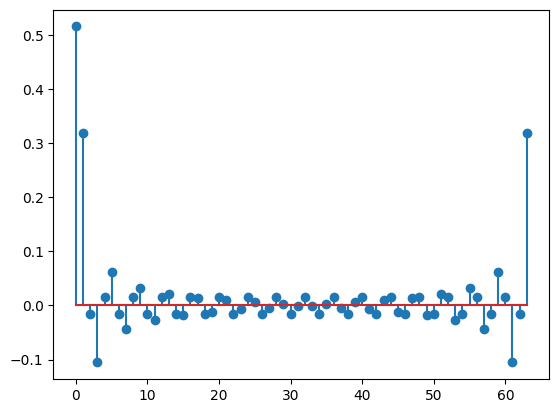

Non-zero count: 64


In [3]:
num_samples = 64

# ---

# floor because ceil will be more than pi/2 digital freq.
upper_bound = int(np.floor(num_samples * ((np.pi / 2) / (2 * np.pi))))
conjugate_lower_bound = num_samples - upper_bound

H = np.zeros(num_samples, dtype=complex)
H[0:upper_bound+1] = 1
H[conjugate_lower_bound:num_samples] = 1

h = np.fft.ifft(H)

plt.figure()
plt.stem(h)
plt.show()

# ---

print(f"Non-zero count: {np.sum(~np.isclose(h, 0))}")

<br>

**Please answer <i>all</i> of the following question:** How many non-zero coefficients does the FIR filter/impulse response have? Is the impulse symmetric? If so, what is the symmetry point?

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

**Repeat the above design with $N=512$.  How many non-zero coefficients does the FIR filter/impulse response have?**

<br>

In [4]:
num_samples = 512

# ---

# floor because ceil will be more than pi/2 digital freq.
upper_bound = int(np.floor(num_samples * ((np.pi / 2) / (2 * np.pi))))
conjugate_lower_bound = num_samples - upper_bound

H = np.zeros(num_samples, dtype=complex)
H[0:upper_bound+1] = 1
H[conjugate_lower_bound:num_samples] = 1

h = np.fft.ifft(H)

print(f"Non-zero count: {np.sum(~np.isclose(h, 0))}")

Non-zero count: 512


<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

A unattractive feature of the above design approach is that we obtain a very large number of small but still non-zero filter coefficients, which makes the implementation expensive. Furthermore, filters created in this way create a lot of spurious <i>ripples</i> in filtered signals. For that reason we typically truncate the number of non-zero filter coefficients.
    
**Use the result for $N=512$ and keep only the most important filter coefficients.** In terms of the impulse response, this means that we keep $h[-K] \dots h[-1], h[0], h[1], \dots h[K]$, and set all other coefficients to zero. **Then compute and plot the frequency response of the resulting FIR filter. Do this for $K=1, 2, 5, 10, 20$.**

<br>

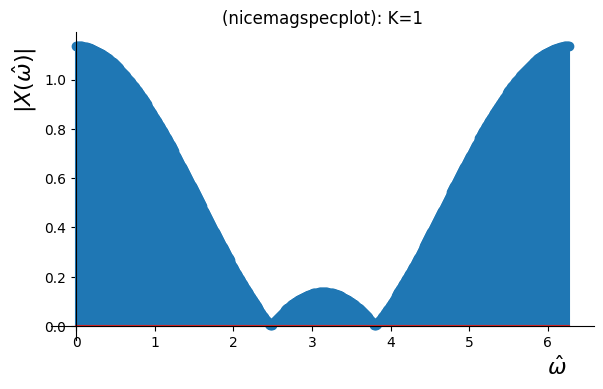

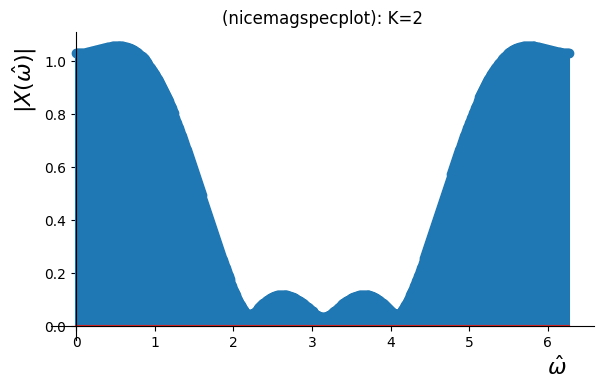

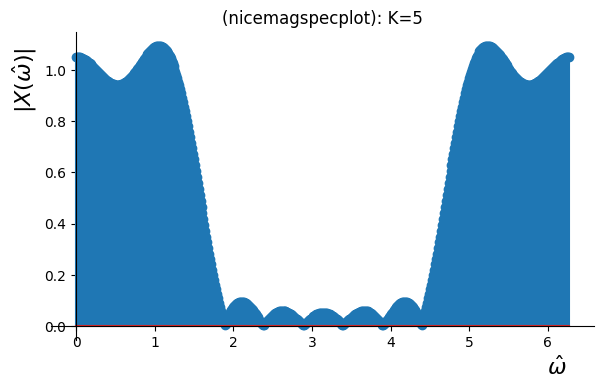

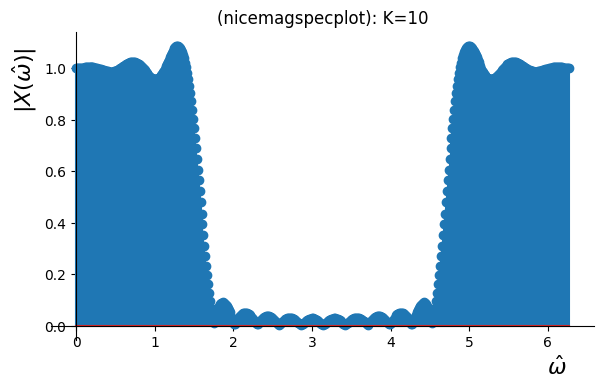

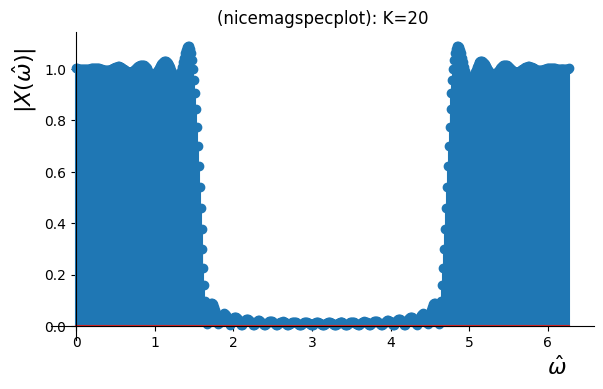

In [5]:
num_samples = 512

# floor because ceil will be more than pi/2 digital freq.
upper_bound = int(np.floor(num_samples * ((np.pi / 2) / (2 * np.pi))))
conjugate_lower_bound = num_samples - upper_bound

H = np.zeros(num_samples, dtype=complex)
H[0:upper_bound+1] = 1
H[conjugate_lower_bound:num_samples] = 1

for K in [1, 2, 5, 10, 20]:
    h = np.fft.ifft(H)
    h[K+1:-(K+1)] = 0
    H2 = np.fft.fft(h)
    nicemagspecplot(num_samples, H2, f"K={K}", [7, 4])
    


<br>

**Please answer <i>all</i> of the following question:** What effects do you observe in the resulting plots? How does changing $K$ impact the plots?

<br>

<div class="alert alert-block alert-success">
    The approximation to the original H gets better and better (with increasing k).  
</div>

<br>

One way of obtaining a better approximation to the desired frequency response of the low-pass filter in the above figure, is gradually pushing the remaining non-zero filter coefficients to zero. This can be achieved by multiplying the truncated impulse response by a raised-cosine window. This time-window is defined by

\begin{equation}
    w[n] = \left\{ \begin{array}{ll} \cos^{2}\Big(\frac{\pi}{2} \cdot \frac{n}{K+1}\Big), & -   
            K\le{n}\le{K},\\  0, & \mbox{elsewhere}. \end{array} \right. 
\end{equation}

Because of symmetry of $h[n]$, circular extension of the  window $w[n]$ is needed. This means that the window looks like this for instance for $K=9$ and $N=32$.

![PA.VI.1%28ii%29.png](graphics/PA.VI.1%28ii%29.png)

**Implement a function that creates the raised-cosine window, and show the result for $K=20$ and $N=128$.**
    
                  
<br>

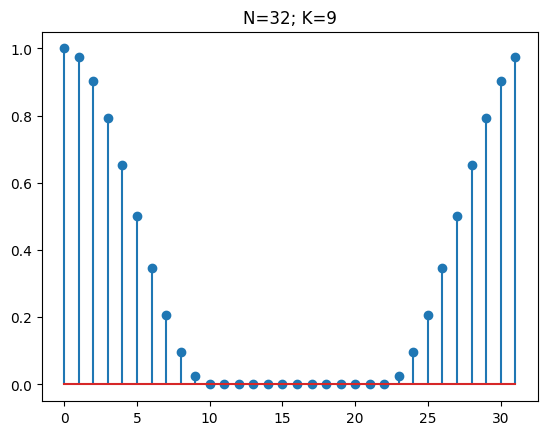

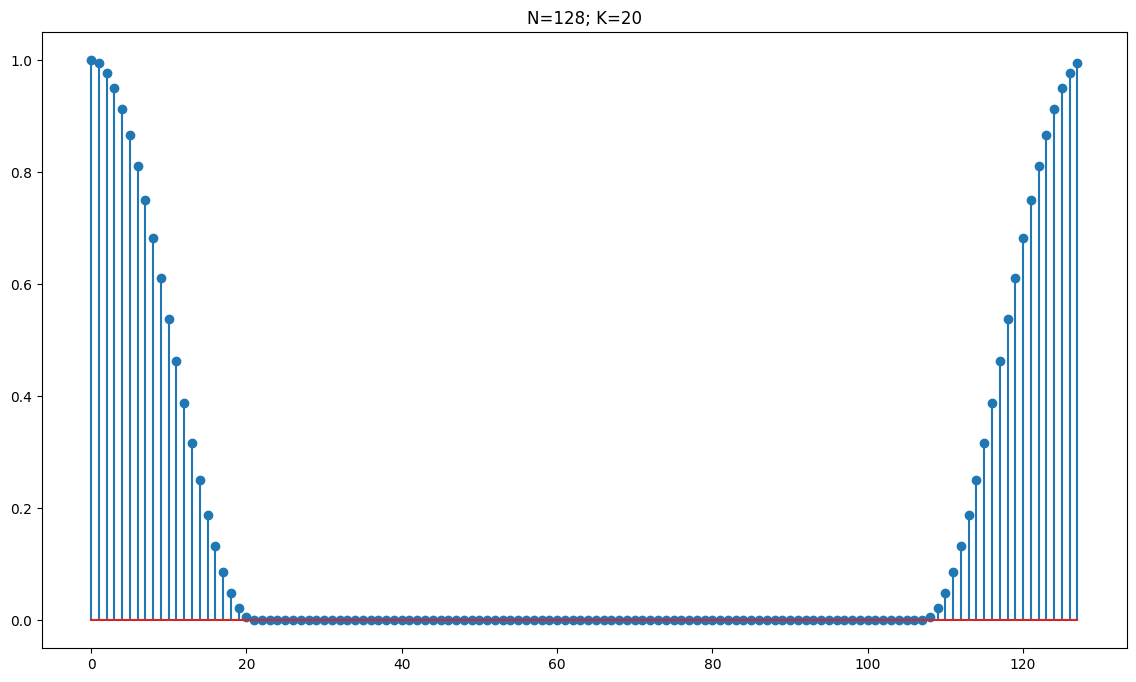

In [6]:
def gradually_push_K_coeffs(h, K):
    w = np.zeros(len(h))
    for n in range(-K, K+1):
        w[n] = (np.cos((np.pi / 2) * (n / (K+1))))**2
    return w

# ---
# ---

num_samples = 32
K = 9

# ---

# floor because ceil will be more than pi/2 digital freq.
upper_bound = int(np.floor(num_samples * ((np.pi / 2) / (2 * np.pi))))
conjugate_lower_bound = num_samples - upper_bound

H = np.zeros(num_samples, dtype=complex)
H[0:upper_bound+1] = 1
H[conjugate_lower_bound:num_samples] = 1

h = np.fft.ifft(H)

# ---

h2 = gradually_push_K_coeffs(h, 9)
plt.stem(h2)
plt.title(f"N={num_samples}; K={K}")
plt.show()

# ---
# ---
    
num_samples = 128
K = 20

# floor because ceil will be more than pi/2 digital freq.
upper_bound = int(np.floor(num_samples * ((np.pi / 2) / (2 * np.pi))))
conjugate_lower_bound = num_samples - upper_bound

H = np.zeros(num_samples, dtype=complex)
H[0:upper_bound+1] = 1
H[conjugate_lower_bound:num_samples] = 1

h = np.fft.ifft(H)

# ---

h2 = gradually_push_K_coeffs(h, K)
plt.figure(figsize=[14, 8])
plt.stem(h2)
plt.title(f"N={num_samples}; K={K}")
plt.show()


<br>

**Use the earlier designed impulse response with $N=512$ and multiply that impulse response with the raised-cosine window ($N=512$). Then compute and plot the frequency response of the resulting FIR filter. Do this for $K=1, 2, 5, 10, 20.$**

<br>

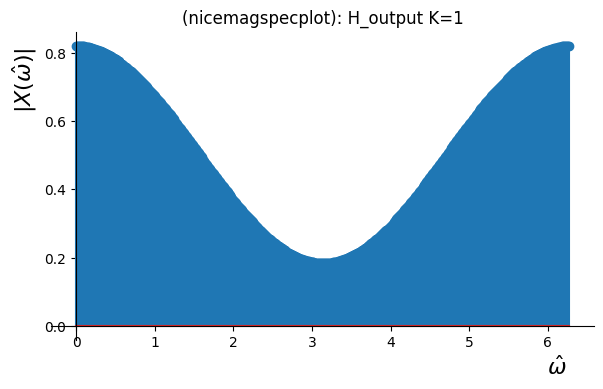

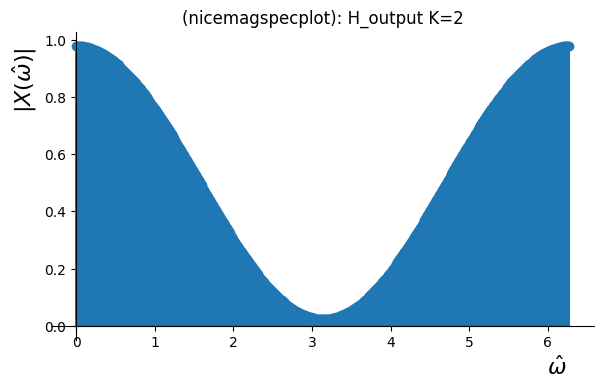

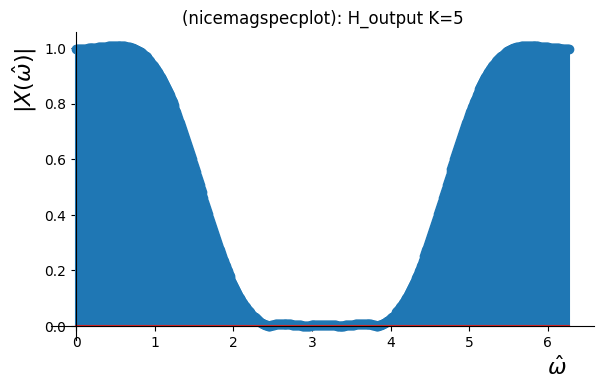

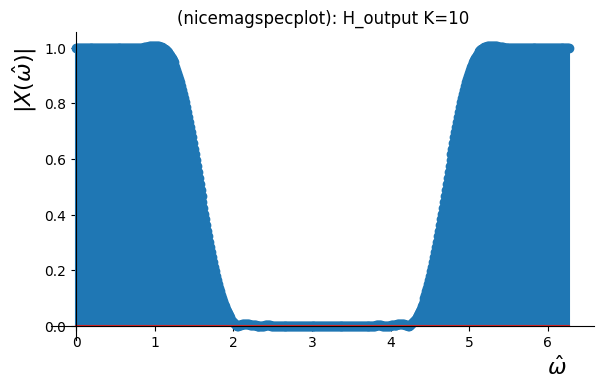

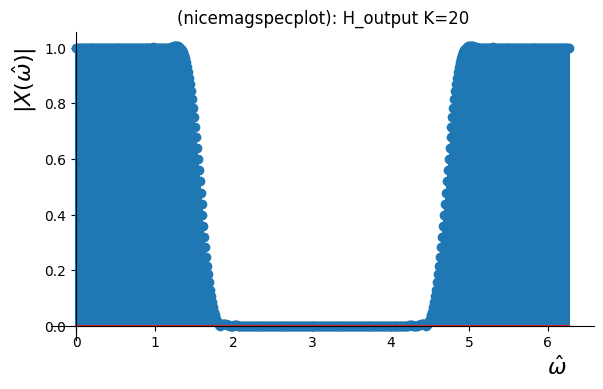

In [7]:
def gradually_push_K_coeffs(h, K):
    w = np.zeros(len(h))
    for n in range(-K, K+1):
        w[n] = (np.cos((np.pi / 2) * (n / (K+1))))**2
    return w

def keep_K_coeffs(h, K):
    h[K+1:-(K+1)] = 0
    return h
    

# ---

num_samples = 512
K = 20

# floor because ceil will be more than pi/2 digital freq.
upper_bound = int(np.floor(num_samples * ((np.pi / 2) / (2 * np.pi))))
conjugate_lower_bound = num_samples - upper_bound

H = np.zeros(num_samples, dtype=complex)
H[0:upper_bound+1] = 1
H[conjugate_lower_bound:num_samples] = 1

for K in [1, 2, 5, 10, 20]:
    h_keep_K_coeffs = keep_K_coeffs(np.fft.ifft(H), K)
    h_raised_cosine_window = gradually_push_K_coeffs(np.fft.ifft(H), K)
    h_output = h_keep_K_coeffs * h_raised_cosine_window
    H_output = np.fft.fft(h_output)
    nicemagspecplot(num_samples, H_output, f"H_output K={K}", [7, 4])


# ---

<br>

**Which effects do you observe? Compare to the earlier frequency responses obtained without applying the raised-cosine window.**

<br>

<div class="alert alert-block alert-success">
    The      entire plot is more gradual and less jittered. So, there's e.g. no two y=0 points at K=1.
</div>

<br>

**Design a FIR filter (find the impulse response) following the above design procedure if the desired frequency response is given by the following figure.** Determine an appropriate number of filter coefficients $(2K+1)$. Also choose the DFT length ($N$) appropriately. **Plot the magnitude and phase spectra of the frequency response of the FIR filter you designed.**
    
![PA.VI.1%28iii%29.png](graphics/PA.VI.1%28iii%29.png)

<br>

In [8]:
# Write your code here

<br>

**Explain in at most five sentences how you designed your high pass filter.**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VI.2 ---------------------------------------------------------------------->

<h3 style="color:blue;"> <u>Python Hands-on Assignment VII.2 Option A: Step counter revisited</u></h3>  

<p style="color: #ee5353;"> For Assignment VII.2 there are two options, and you should only complete one. <i>You should choose the same option as you chose in Assignment IV.2.</i> So if you chose option A before, choose option A now. </p>
 
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assigment.</b>
<ul>
<li> Show the magnitude of the spectrum of the ideal walking signal in overlay with the transfer function of the FIR filter.</li>
<li>Show a plot of the normalized signals in the (at least 4) segments.</li>
<li>Show the filtered magnitude spectra of the segments, and explain which detection rule you would apply.</li>
<li> (Optionally) Show the result of the complete detection algorithm.</li>
</ul>
<hr>
</div>

We reconsider the problem of counting steps addressed in Python assignment IV.2. With the tools of Fourier analysis, we can now develop a system that distinguishes between walking and other movements based on the spectral content. 

We first consider the ideal signal that would result if no degradations occur in the walking motion and if the walking is extremely smooth. The file `data/idealwalkingpattern.pkl` contains such ideal signal, derived from the “perfect step” signal values listed in Python assignment IV.2. The sampling frequency of the signal is 9.5 Hz.

**Compute the magnitude spectrum of this "perfect" walking pattern, visualize the result, and find the walking frequency (in steps per second).** When visualizing spectra, use a proper frequency axis in Hertz, running from 0 Hz up to the sampling frequency of the signal.<br><br>

<br>

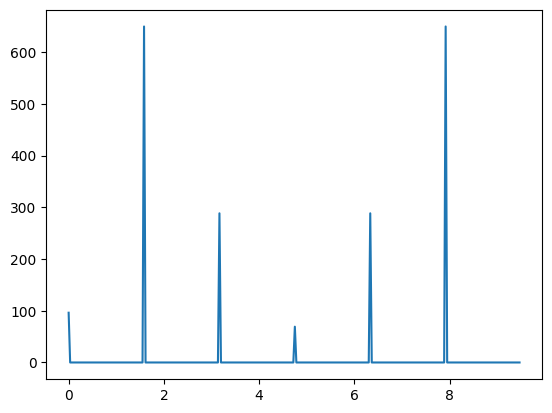

In [9]:
ideal_data = np.load("data/idealwalkingpattern.pkl",allow_pickle=True)
f_s = 9.5
num_samples = len(ideal_data)

X = np.fft.fft(ideal_data)
omega_hat = (np.arange(0, num_samples) * 2 * np.pi) / num_samples
f = (omega_hat / (2 * np.pi)) * f_s



plt.figure()
plt.plot(f[f < f_s], np.abs(X[f < f_s]))
plt.show()

# X = np.fft.rfft(ideal_data)
# f = np.fft.rfftfreq(num_samples, d=1/f_s)   # Hz
# plt.plot(f, np.abs(X))


<br>

Based on this walking pattern, we can design a proper low pass filter to try to separate “walking” from “other movements”. The impulse response of the FIR filter (order 55) is given by the following coefficients.

![PA.VI.2.png](graphics/PA.VI.2.png)

To avoid retyping, the coefficients are given in the file `data/fir55.txt`. **Compute and visualize the transfer function of this filter (magnitude and phase). Overlay the magnitude of the transfer function on the magnitude spectrum of the "perfect" walking pattern using the same (!) horizontal frequency scale.**

<br>

(300,) (512,)


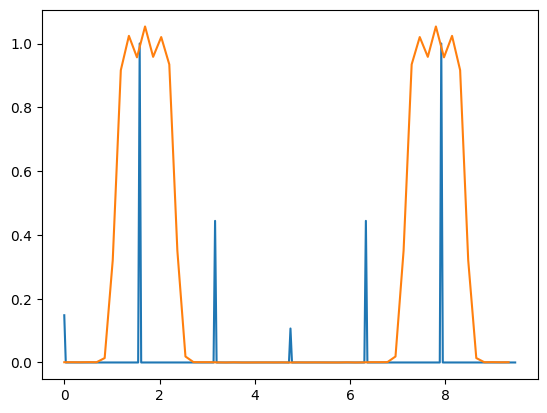

In [10]:
plt.figure()

# ---

ideal_data = np.load("data/idealwalkingpattern.pkl",allow_pickle=True)
f_s = 9.5
num_samples = len(ideal_data)

X = np.fft.fft(ideal_data)
omega_hat = (np.arange(0, num_samples) * 2 * np.pi) / num_samples
f = (omega_hat / (2 * np.pi)) * f_s

abs_X = np.abs(X)
plt.plot(f, abs_X / np.max(abs_X))

# ---
with open("data/fir55.txt", "r") as f:
    data = f.read()
    data = [float(x) for x in data.split("\n")]

num_samples = len(data)
H = np.fft.fft(data)
omega_hat = (np.arange(0, num_samples) * 2 * np.pi) / num_samples
f = (omega_hat / (2 * np.pi)) * f_s

plt.plot(f, np.abs(H))

# ---

plt.show()

<br>

**Explain why this filter is indeed useful.**

<br>

<div class="alert alert-block alert-success">
    It passes through only the useful frequencies (approximately).
</div>

<br>

We now consider the real walking signal, stored in the file `data/walkingdata.pkl`. We will use the FIR filter to separate walking from other movements. 
    
**Load the walking pattern and select at least <b>four time segments</b> in the signal that have a clearly different signal wave form, that is, different types of movements.** Use segment lengths of around 64 – 128 samples, use segments of the same length. **In order to make the segments comparable, normalize the signals by first subtracting the mean and next normalize the signal’s variance to unity.** The resulting signal segments then have mean zero and variance one. **Next compute the magnitude spectrum of each segment and visualize the results in a single plot.**

<br>

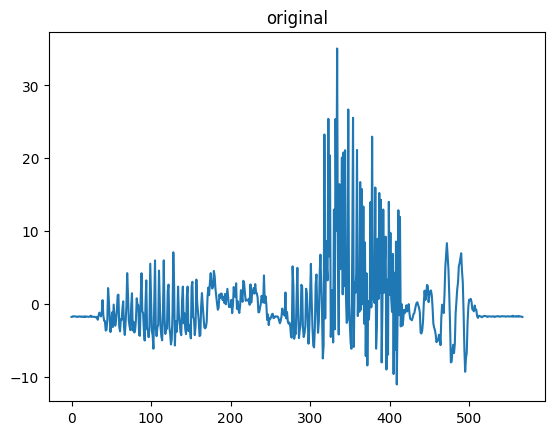

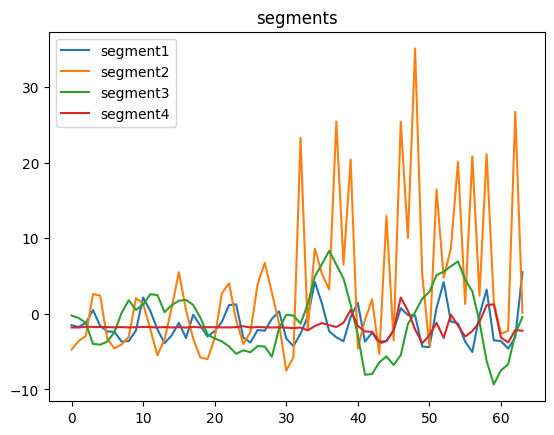

In [11]:
data = np.load("data/walkingdata.pkl")

plt.figure()
plt.plot(data)
plt.title("original")
plt.show()

num_samples = 64

# def normalize(segment):
#     return np.mean()

segment1 = data[100-num_samples:100]
segment2 = data[350-num_samples:350]
segment3 = data[500-num_samples:500]
segment4 = data[0:num_samples]

assert len(segment1) == num_samples
assert len(segment2) == num_samples
assert len(segment3) == num_samples
assert len(segment4) == num_samples

plt.figure()
plt.plot(segment1)
plt.plot(segment2)
plt.plot(segment3)
plt.plot(segment4)
plt.legend(["segment1", "segment2", "segment3", "segment4"])
plt.title("segments")
plt.show()


<br>

**Filter each segment using the FIR filter `fir55`. Execute the convolution in the Fourier domain** by multiplying the DFT of the signal segment by the transfer function of the FIR filter (<i>do NOT use the numpy-convolution operation</i>). **Visualize the resulting magnitude spectra after filtering in a single plot.**

<br>

In [12]:
# Write your code here

<br>

From the figure just obtained you should be able to propose of a way to discriminate 'walking' from 'other movements'. **What is your proposal for such a detection rule?**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

**If you have time left, you can implement the detection strategy you proposed. This is not mandatory.** Use the following algorithm structure that works with overlapping segments.
    
<ul>   
<li>$N = 0$ (start at the first sample).</li>
<li> 	Extract $K$ samples, starting at sample $N$.</li>
<li>	Compute the (magnitude of the) DFT of the segment. Filter the segment with the FIR filter as done before in this assignment.</li>
<li>	Apply the detection rule you proposed on the segment, and decide if this segment contains a walking signal or some other movement.</li>
<li>Increase $N$ with a certain value, say between $1$ and $K$ (practical would be $K/4$ or $K/2$). This is the starting point of the next segment.</li>
<li>	If $N + K$ is larger than the length of the signal, we are done. Otherwise go to the second step.</li>
</ul>

<br>

In [13]:
# Write your code here

<br>

**Evaluate the result you obtain. How satisfied are you? Ideas for improvement? Other filter? Other detection rule? Other approach?**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VI.3 ---------------------------------------------------------------------->

<h3 style="color:blue;"> <u>Python Hands-on Assignment VII.2 option_B: COVID-19 prediction revisited</u></h3>  

<p style="color: #ee5353;"> For Assignment VII.2 there are two options, and you should only complete one. <i>You should choose the same option as you chose in Assignment IV.2.</i> So if you chose option B before, choose option B now. </p>

<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assigment.</b>
<ul>
<li> Plot the amplitude spectra of the  COVID-19 infection data and the COVID-19 number of deaths data, using the proper frequency axis.
<li> Find the frequency (frequencies) of the periodic peaks that exist in the COVID-19 infection data.
<li> Find the frequency (frequencies) of the periodic peaks that exist in the COVID-19 patient death data.
<li> Use the DFT-design method to find an FIR filter to smooth the COVID-19 patient death data, and show the filtered result.
</ul>
<hr>
</div>
    
    
We reconsider the problem of COVID-19 infection and deaths of patients that we addressed in Python assignment IV.2 Option B. With the tools of Fourier analysis, we can find periodicities -- or infection waves -- in the COVID-19 data. 
    
**Load the COVID data (see Assignment IV.2 Option B for code snippet) and plot the data for the number of infections. It is clear that peaks (waves, periodicities) exist in the data. Compute and plot the amplitude spectrum of the data. Find the frequency of the periodic peaks that exist in the data.**
    
As hints for developing the signal processing steps, we suggest the following.

<ul>
<li> The signal mean will lead to a large and dominant DFT coefficient. Set the signal mean to zero for better analysis (different ways for doing that exist).
<li> The sample frequency of the data is $f_s = 1 $ sample per day, corresponding to the digital frequency $2\pi$. For easier interpretation, you choose between a digital frequency axis that runs from 0 to $2\pi$, or a Hertzian frequency axis that runs from  0 Hz up to the sampling frequency of the signal.
<li> If you prefer, you can work with part of the data, for instance removing part of the head of the signal that may not contain much useful information.
<li> Realize that these periodicities are not perfect harmonics (cosine signals). Peaks in the amplitude spectrum will thefore spread out somewhat, requiring you to make an estimate of the dominant frequency.
<ul>

<br>

In [14]:
# Write your code here

<br>

**Next, load and plot the COVID data for the number of deaths.** It is clear from the data that peaks (waves, periodicities) also exist in this data. **Compute and plot the amplitude spectrum of the data. Find the frequency of the periodic peaks that exist in the data.**

<br>

In [15]:
# Write your code here

<br>

The data exhibits long-term periodicity (low frequency) and a short-term periodicity (relatively high frequency). **What is your explanation for these two types of periodicities?**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

In your previous answer it should be clear that the relatively short-term (high-frequency) periodicity is merely an artifact of the reporting methods used. **Design a FIR low-pass filter with cut-off frequency of approximately 0.5 (rad) and order of 40 (41 FIR coefficients) to remove this artifact.** Make use of the approach and code that you developed in Assignment VII.1. **List the filter coefficient, plot the magnitude response of the filter, and show the filtered signal.**

<br>

In [16]:
# Write your code here

<hr style="height:3px; border:none; background-color:blue;">